In [585]:
using OnlineStats, GLM, DataFrames, Gadfly

# generate data with sparse coefficient vector
n, p = 1_000_000, 50
x = randn(n, p)
β = vcat(ones(5), zeros(p - 5))  # β = [1,1,1,1,1,0,0,0,...]
y = x * β + randn(n);

In [586]:
# Timing: SGD vs. Linear Model Fit
@time o = SGModel(x, y, intercept = false, algorithm = SGD(r=.6))
@time l = lm(x, y);

  0.351584 seconds (1.00 M allocations: 45.778 MB, 16.28% gc time)
  1.162837 seconds (51 allocations: 404.409 MB, 0.19% gc time)


In [588]:
# SGD approximation
coef(o)[1:7]'

1x7 Array{Float64,2}:
 1.0125  1.00237  1.00466  0.98731  1.00993  0.0263747  0.00599638

In [589]:
# Exact estimates
coef(l)[1:7]'

1x7 Array{Float64,2}:
 0.999167  1.00106  0.999018  0.999738  1.0008  0.00086561  -0.000143575

In [590]:
# Max absolute difference between SGD and exact estimate
maxabs(coef(o) - coef(l))

0.025509057769105347

In [591]:
# Max absolute difference between SGD and truth
maxabs(coef(o) - β)

0.026374667351524026

# Visualize the algorithm

In [662]:
# True coefficients
β = [-2, -1, 0, 1, 2] 


n, p = 200, 5
o = SGModel(p, algorithm = SGD(r = .4))  # γ_t = 1 / t^r
m = Means(p + 1)
df = DataFrame(vcat(state(o)...)')
dfm = DataFrame(vcat(state(m)...)')
names!(df, vcat([symbol("β$i") for i in 0:p]..., :nobs))
names!(dfm, vcat([symbol("β$i") for i in 0:p]..., :nobs));

In [663]:
for j in 1:100
    x = randn(n, p)
    y = x * β + randn(n);
    for i in 1:n
        update!(o, vec(x[i,:]), y[i])
        nobs(o) > 1000 && update!(m, coef(o))
    end
    push!(df, vcat(state(o)...)')
    s = vcat(state(m)...)
    push!(dfm, s)
    df_melt = melt(df, :nobs)
    dfm_melt = melt(dfm, :nobs)
end

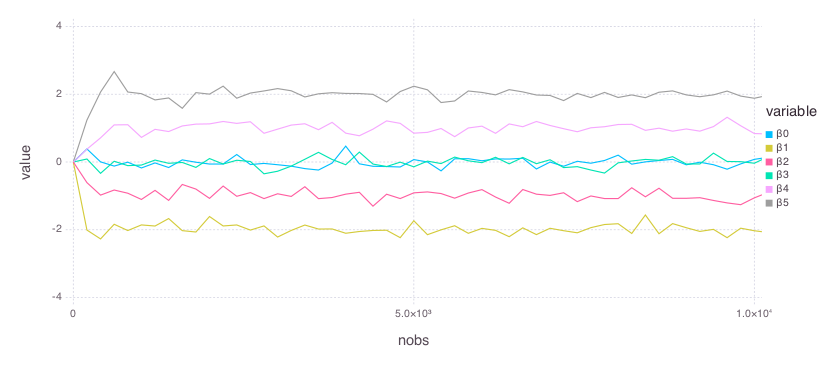

In [664]:
pl = plot(df_melt, x=:nobs, y=:value, color=:variable, Geom.line, Scale.x_continuous(minvalue=0,maxvalue=10_000), Scale.y_continuous(minvalue=-4, maxvalue=4))
draw(PNG(22cm, 10cm), pl)

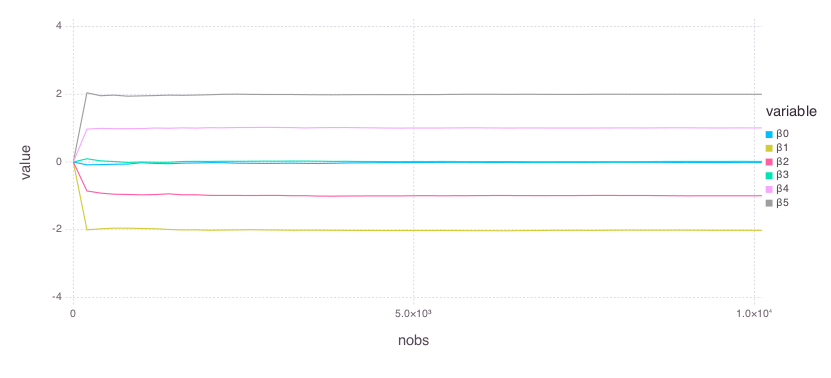

In [665]:
pl = plot(dfm_melt, x=:nobs, y=:value, color=:variable, Geom.line, Scale.x_continuous(minvalue=0,maxvalue=10_000), Scale.y_continuous(minvalue=-4, maxvalue=4))
draw(PNG(22cm, 10cm), pl)